In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
import tensorflow as tf
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout

# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

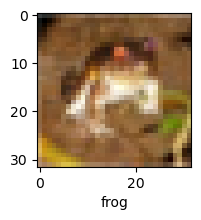

In [5]:
plot_sample(X_train, y_train, 0)

# Normalize training data before training the neural net

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [6]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
# model.add(Conv2D(32, (5,5), activation='relu'))
# model.add(MaxPooling2D((4,4)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=100, shuffle=True, callbacks=[early_stop])

Epoch 1/50
500/500 [==============================] - 82s 163ms/step - loss: 1.6335 - accuracy: 0.3871 - val_loss: 1.2740 - val_accuracy: 0.5409
Epoch 2/50
500/500 [==============================] - 89s 179ms/step - loss: 1.1859 - accuracy: 0.5703 - val_loss: 1.0746 - val_accuracy: 0.6184
Epoch 3/50
500/500 [==============================] - 81s 162ms/step - loss: 1.0030 - accuracy: 0.6440 - val_loss: 0.9526 - val_accuracy: 0.6620
Epoch 4/50
500/500 [==============================] - 79s 158ms/step - loss: 0.8978 - accuracy: 0.6830 - val_loss: 0.8193 - val_accuracy: 0.7129
Epoch 5/50
500/500 [==============================] - 86s 171ms/step - loss: 0.8178 - accuracy: 0.7101 - val_loss: 0.7810 - val_accuracy: 0.7294
Epoch 6/50
500/500 [==============================] - 82s 164ms/step - loss: 0.7466 - accuracy: 0.7346 - val_loss: 0.7146 - val_accuracy: 0.7547
Epoch 7/50
500/500 [==============================] - 85s 169ms/step - loss: 0.6938 - accuracy: 0.7562 - val_loss: 0.7231 - val_ac

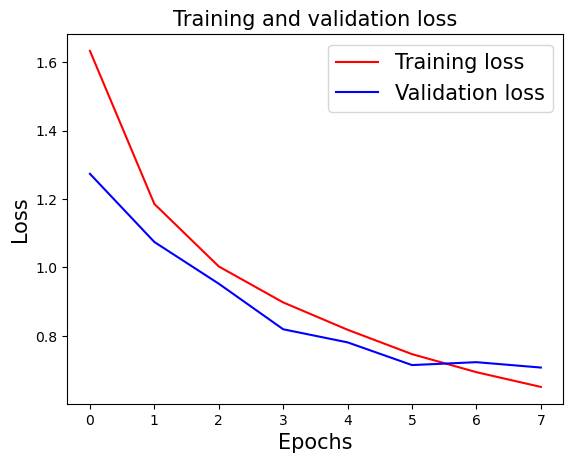

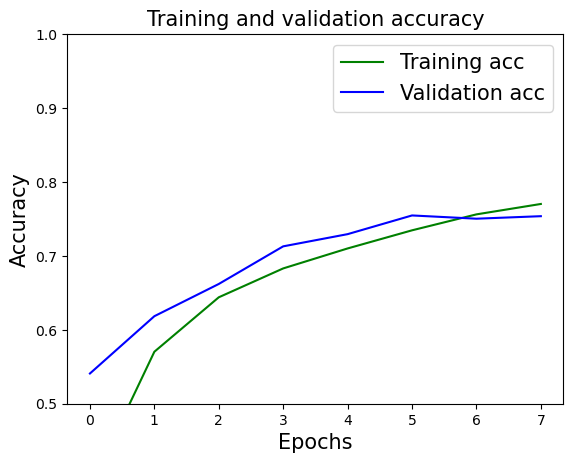

In [11]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

# Evaluation of Model

In [12]:
acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.7146 - accuracy: 0.7547


In [13]:
print('The accuracy is' , round(acc[1], 3))

The accuracy is 0.755


313/313 [==============================] - 6s 18ms/step


Text(95.72222222222221, 0.5, 'Truth')

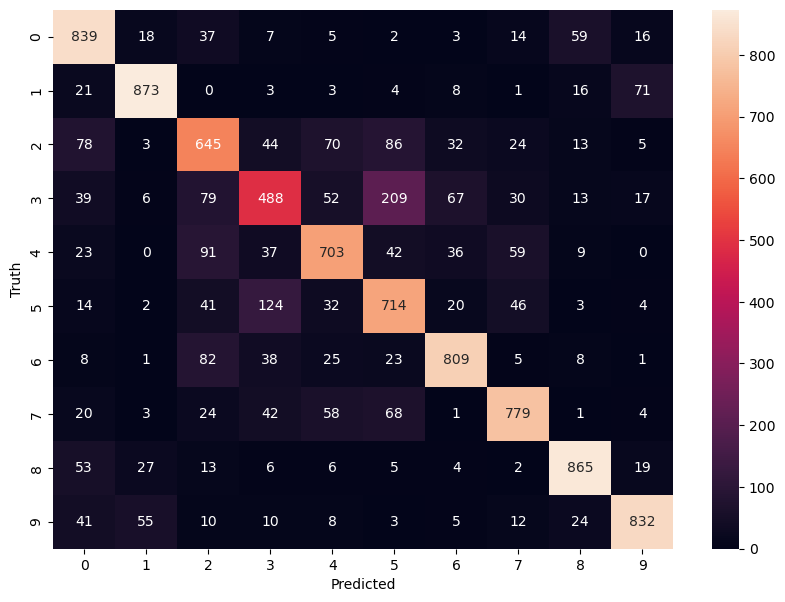

In [14]:
import tensorflow as tf

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79      1000
           1       0.88      0.87      0.88      1000
           2       0.63      0.65      0.64      1000
           3       0.61      0.49      0.54      1000
           4       0.73      0.70      0.72      1000
           5       0.62      0.71      0.66      1000
           6       0.82      0.81      0.82      1000
           7       0.80      0.78      0.79      1000
           8       0.86      0.86      0.86      1000
           9       0.86      0.83      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

